# **HackerEarth Deep Learning Challenge: #FriendshipGoals**

Contest link: [https://www.hackerearth.com/challenges/competitive/hackerearth-deep-learning-challenge-friendship-day/?utm_source=challenges-modern&utm_campaign=participated-challenges&utm_medium=right-panel](https://www.hackerearth.com/challenges/competitive/hackerearth-deep-learning-challenge-friendship-day/?utm_source=challenges-modern&utm_campaign=participated-challenges&utm_medium=right-panel)

## **Mounting drive on Collab**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wG3Cnm-70HL6V7XgiqDg92B3x9bkTkP_znN1dyTlKTAJpez_Uh9cP0
Mounted at /content/drive


## **Download dataset in drive directly from Kaggle**

In [58]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/kaggle"

#changing the working directory
%cd /content/drive/My Drive/kaggle

/content/drive/My Drive/kaggle


In [59]:
!kaggle datasets download -d bing101/friendshipgoals 

friendshipgoals.zip: Skipping, found more recently modified local copy (use --force to force download)


### **Or Download Dataset manually from here**
[https://www.kaggle.com/bing101/friendshipgoals/download](https://www.kaggle.com/bing101/friendshipgoals/download)


## **Unzipping Dataset**

In [ ]:
!unzip \*.zip  && rm *.zip

## **Oh Libraries! What are we without you**

In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil, random

from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, GlobalAveragePooling2D, GaussianNoise

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, regularizers, layers, optimizers, losses, metrics
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import preprocess_input

In [62]:
image_size = 224
num_classes = 3

train_path = '/content/drive/My Drive/kaggle/data/train'
validate_path = '/content/drive/My Drive/kaggle/data/validate'
test_path = '/content/drive/My Drive/kaggle/data/test'

## **Train - Validate Split**
### Given kaggle dataset has no separate validation images folder. Transfering ~20% of train images classwise to validation folder 

In [64]:
for name in ["/Toddler/", "/Teenagers/", "/Adults/"]:

  source = train_path + name
  dest = validate_path + name

  images = os.listdir(source)
  print(len(images))

  for image in images[:200]:
      shutil.move(source+image, dest+image)

947
921
935


## **Image Data Generator**

In [141]:
data_generator_train = ImageDataGenerator( preprocessing_function= preprocess_input,
                                           horizontal_flip = True,
                                           width_shift_range = 0.2,
                                           height_shift_range = 0.2,
                                           rotation_range = 10
                                          )
            
data_generator_validate = ImageDataGenerator(preprocessing_function= preprocess_input)

data_generator_test = ImageDataGenerator(preprocessing_function= preprocess_input)

In [142]:
train_generator = data_generator_train.flow_from_directory(
        directory = train_path,
        shuffle=True,
        target_size=(image_size, image_size),
        batch_size= 16,
        class_mode='categorical',
        )

validation_generator = data_generator_validate.flow_from_directory(
        directory = validate_path,
        shuffle=True,
        target_size=(image_size, image_size),
        batch_size = 16,
        class_mode='categorical',
        )

test_generator = data_generator_test.flow_from_directory(
        directory = test_path,
        shuffle=False,
        target_size=(image_size, image_size),
        class_mode=None,
        )

Found 2203 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 314 images belonging to 1 classes.


## **Creating Model - with ResNet50V2 as Base Model**

In [143]:
#base Model
conv_base = ResNet50V2(weights='imagenet', include_top=False, input_shape = (image_size, image_size, 3))

for layer in conv_base.layers[:]:
  layer.trainable = False

my_model = Sequential()
my_model.add(conv_base)
my_model.add(GlobalAveragePooling2D())
my_model.add(Dense(64, activation='relu'))
my_model.add(Dropout(0.2))
my_model.add(Dense(32, activation='relu'))
my_model.add(Dropout(0.2))
my_model.add(Dense(num_classes, activation='softmax'))


In [144]:
my_model.compile(optimizer= Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

## **Model Summary**

In [145]:
print(my_model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_8 ( (None, 2048)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                131136    
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_17 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 3)                

## **Fitting the Model**

In [146]:
history = my_model.fit(train_generator,
                        # steps_per_epoch=40,
                        epochs = 5,
                        validation_data=validation_generator
                      )

Epoch 1/5
138/138 [==============================] - 34s 248ms/step - loss: 1.1036 - accuracy: 0.4231 - val_loss: 0.9986 - val_accuracy: 0.4700
Epoch 2/5
138/138 [==============================] - 33s 240ms/step - loss: 0.9873 - accuracy: 0.4925 - val_loss: 0.9245 - val_accuracy: 0.5483
Epoch 3/5
138/138 [==============================] - 33s 239ms/step - loss: 0.9369 - accuracy: 0.5306 - val_loss: 0.8810 - val_accuracy: 0.5750
Epoch 4/5
138/138 [==============================] - 33s 239ms/step - loss: 0.8906 - accuracy: 0.5683 - val_loss: 0.8622 - val_accuracy: 0.5900
Epoch 5/5
138/138 [==============================] - 33s 240ms/step - loss: 0.8673 - accuracy: 0.5942 - val_loss: 0.8454 - val_accuracy: 0.5817


## **Plotting Accuracy and Loss**

Text(0.5, 1.0, 'Training and validation loss')

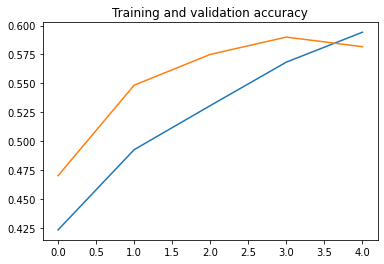

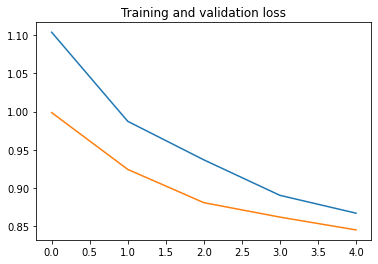

In [147]:
acc      = history.history[ 'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot( epochs, acc )
plt.plot( epochs, val_acc )
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

## **Fine-tuning last few layers of base ResNet50V2 Model**

In [148]:
for layer in conv_base.layers[:179]:
   layer.trainable = False
for layer in conv_base.layers[179:]:
   layer.trainable = True

for i, layer in enumerate(conv_base.layers):
   print(i, layer.name, layer.trainable)

0 input_9 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

In [149]:
# conv_base.layers[179].trainable = True
# conv_base.layers[180].trainable = False
# conv_base.layers[184].trainable = False

In [150]:
my_model.compile(optimizer= Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [152]:
history = my_model.fit(train_generator,
                      #  steps_per_epoch=40,
                        epochs = 5,
                        validation_data=validation_generator
                      )

Epoch 1/5
138/138 [==============================] - 33s 240ms/step - loss: 0.7880 - accuracy: 0.6464 - val_loss: 0.8374 - val_accuracy: 0.6100
Epoch 2/5
138/138 [==============================] - 33s 242ms/step - loss: 0.7721 - accuracy: 0.6600 - val_loss: 0.8296 - val_accuracy: 0.6117
Epoch 3/5
138/138 [==============================] - 33s 241ms/step - loss: 0.7386 - accuracy: 0.6754 - val_loss: 0.8357 - val_accuracy: 0.6233
Epoch 4/5
138/138 [==============================] - 33s 240ms/step - loss: 0.7308 - accuracy: 0.6786 - val_loss: 0.8441 - val_accuracy: 0.6233
Epoch 5/5
138/138 [==============================] - 33s 241ms/step - loss: 0.7093 - accuracy: 0.6904 - val_loss: 0.8383 - val_accuracy: 0.6117


## **Label Encoding the Images**

In [153]:
lst = ['Adults','Teenagers','Toddler']
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
LE.fit(lst)

LabelEncoder()

## **Model Prediction**

In [154]:
prediction = my_model.predict(test_generator)
result = np.argmax(prediction, axis=1)

img_names = os.listdir('/content/drive/My Drive/kaggle/data/test/test')

target = {}

for i,img in enumerate(img_names):
  target[img] = LE.inverse_transform([result[i]])[0]

In [155]:
result[:5]

array([1, 0, 1, 1, 1])

In [156]:
img_names[:5]

['Img1001.jpg', 'Img1017.jpg', 'Img1020.jpg', 'Img1025.jpg', 'Img1038.jpg']

## **Generate output.csv** - Containing predictions for given test images

In [157]:
labels = pd.read_csv('/content/drive/My Drive/kaggle/data/Test.csv')
img_names = labels.iloc[:,:].values.reshape(-1,)

final= []
for img in img_names:
  final.append([img, target[img]])

df = pd.DataFrame(final, columns = ["Filename","Category"])
output_csv = df.to_csv('./output.csv', index=False)

## **Analysis of output.csv**

In [159]:
kk = pd.read_csv('output.csv')

In [160]:
kk.head()

,Filename,Category
0,Img1137.jpg,Adults
1,Img3633.jpg,Teenagers
2,Img1474.jpg,Adults
3,Img3459.jpg,Adults
4,Img5578.jpg,Toddler


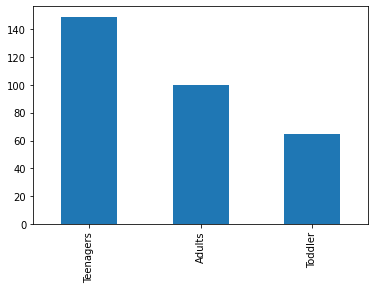

In [161]:
kk['Category'].value_counts().plot(kind='bar')